### Notebook for checking datasets properties in frequency domain

This notebook is excpecting the data to be numeric. A method of ensuring this to first use Pre_Processing_USE-4.ipynb.

 Cells are executed in the order in which they appear in the notebook.

In [9]:
# Import libraries
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

from img_tools import reshape_rows, plot_FFT

Import data set for the seperate classes

In [3]:
# import left and right df for visualization
X_right = pd.read_csv('X_right_numeric.csv')
X_left = pd.read_csv('X_left_numeric.csv')

X_right = np.asarray(X_right).astype(np.float_)
X_left = np.asarray(X_left).astype(np.float_)

Perform scaling of the data, reshape to 2D image and histogram stretch.

In [4]:
# Append the two arrays to train scaler
X = np.append(X_right, X_left, axis=0)

# Train scaler
scaler = StandardScaler().fit(X)

In [5]:
# Perform scaling of the data
X_right = scaler.transform(X_right)
X_left = scaler.transform(X_left)

In [7]:
# Check shape of the data
X_left.shape

(169, 68)

In [11]:
# Find fitting filter mask and border strategy
filtermask = cv2.getGaussianKernel(3,1)
borderType = cv2.BORDER_DEFAULT

# Remember to change the dimensions/shape to fit the data !!!
right_arr = reshape_rows(X_right, filtermask, borderType, (4,17))
left_arr = reshape_rows(X_left, filtermask, borderType, (4,17))

Check the mean of the two classes and visualize the mean for inspection for trends.

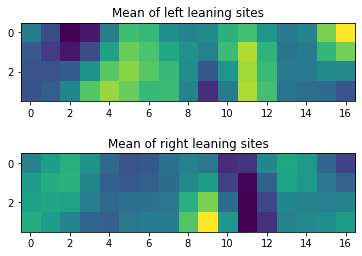

In [12]:
# find mean of images and plot
mean_img_left = np.mean(left_arr, axis=0)
mean_img_right = np.mean(right_arr, axis=0)

plt.subplot(2, 1, 1)
plt.title("Mean of left leaning sites")
plt.imshow(mean_img_left)

plt.subplot(2, 1, 2)
plt.title("Mean of right leaning sites")
plt.imshow(mean_img_right)
plt.subplots_adjust(hspace=0.5)
plt.show
plt.savefig('mean_pages.png')

Take Fourier transform of the data and plot the magnitude and phase of the transform.

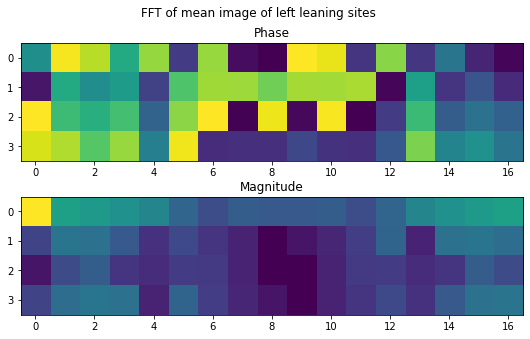

<Figure size 432x288 with 0 Axes>

In [13]:
# Plot FFT of mean left image
plot_FFT(mean_img_left, 'left')

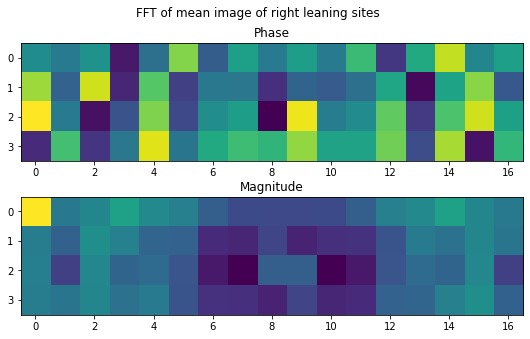

<Figure size 432x288 with 0 Axes>

In [14]:
# Plot FFT of mean right image
plot_FFT(mean_img_right, 'right')